                                                 url      Type
0  https://docs.google.com/presentation/d/e/2PACX...  Phishing
1    https://btttelecommunniccatiion.weeblysite.com/  Phishing
2                        https://kq0hgp.webwave.dev/  Phishing
3  https://brittishtele1bt-69836.getresponsesite....  Phishing
4         https://bt-internet-105056.weeblysite.com/  Phishing
domain
cloudflare-ipfs.com        3220
docs.google.com            3165
ipfs.eth.aragon.network    2180
cf-ipfs.com                1354
new.express.adobe.com       949
ipfs.io                     877
sites.google.com            658
tinyurl.com                 650
ipfs.best-practice.se       236
shorturl.at                 227
Name: count, dtype: int64


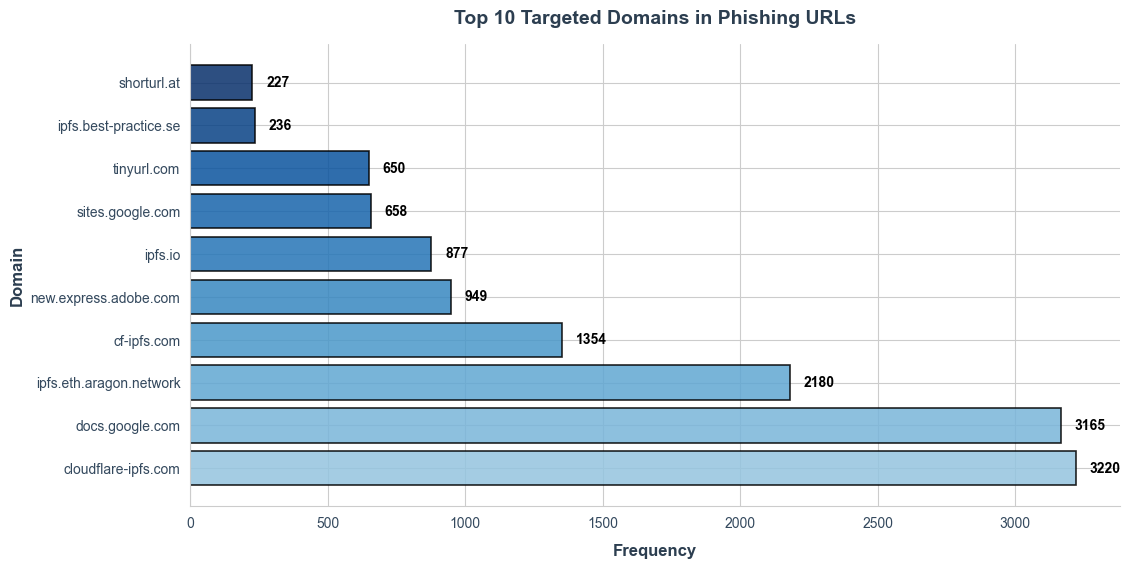

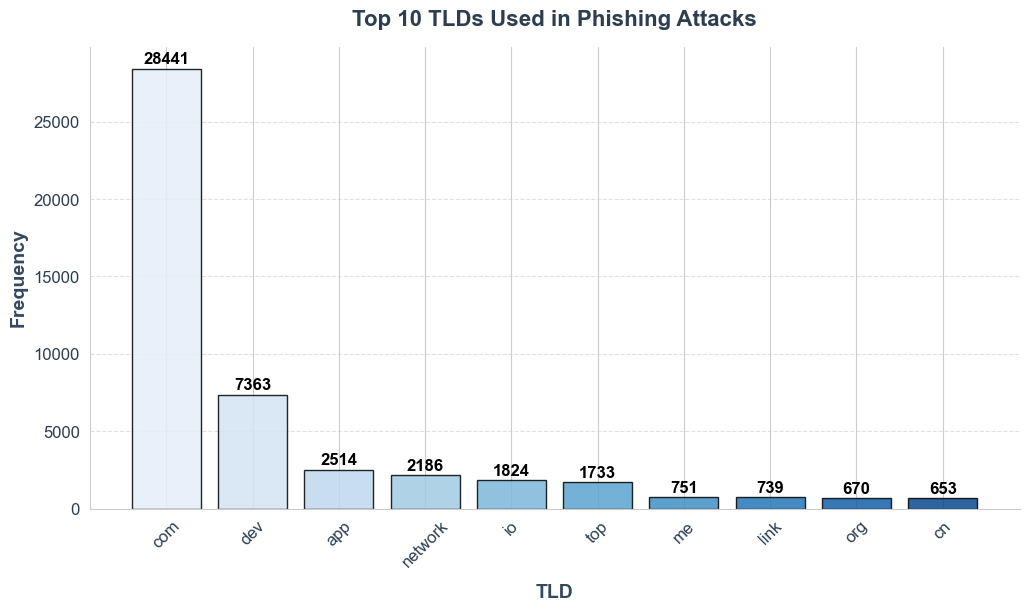

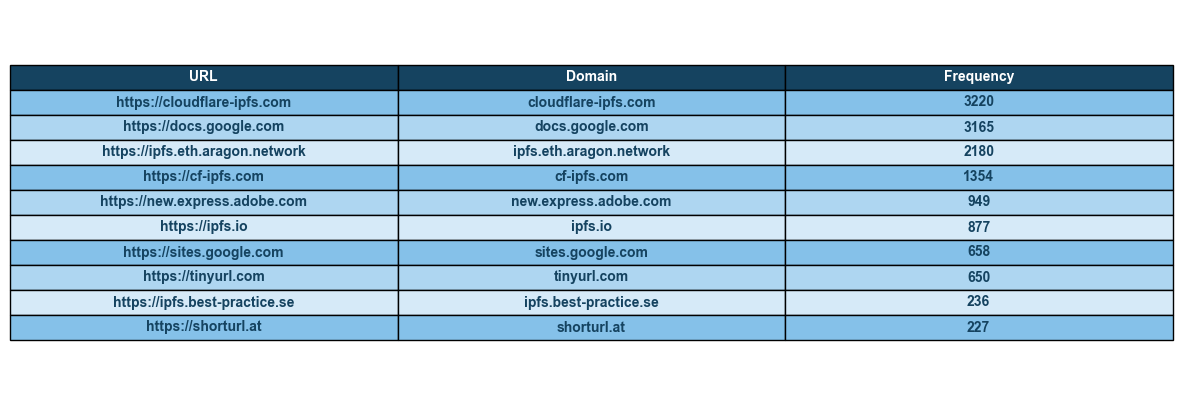

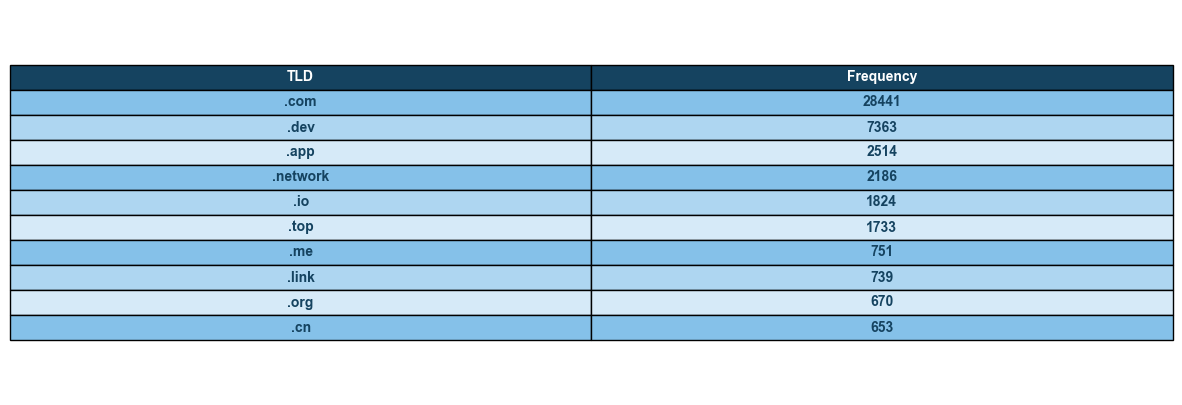

In [2]:
import pandas as pd

# Download data:
file_path = "Phishing URLs.csv" 
data = pd.read_csv(file_path)

# Show the first 5 rows to ensure the data is attached:
print(data.head()) 
#--------------------------------------------------------------------------------------

# Extract domain names from URLs:
from urllib.parse import urlparse

data['domain'] = data['url'].apply(lambda x: urlparse(x).netloc)

# Count the number of times each domain is repeated:
domain_counts = data['domain'].value_counts()

# Show top 10 targeted domains:
print(domain_counts.head(10)) 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Selection of top 10 domains:
top_domains = domain_counts.head(10)
#--------------------------------------------------------------------------------------
# Drawing settings
fig, ax = plt.subplots(figsize=(12, 6))

colors = plt.cm.Blues(np.linspace(0.4, 1, len(top_domains)))

bars = ax.barh(top_domains.index, top_domains.values, color=colors, edgecolor='black', alpha=0.8)

ax.set_title('Top 10 Targeted Domains in Phishing URLs', fontsize=14, fontweight='bold', color='#2c3e50', pad=15)
ax.set_xlabel('Frequency', fontsize=12, fontweight='bold', color='#2c3e50', labelpad=10)
ax.set_ylabel('Domain', fontsize=12, fontweight='bold', color='#2c3e50') 

ax.xaxis.set_tick_params(labelsize=10, colors='#34495e')
ax.yaxis.set_tick_params(labelsize=10, colors='#34495e')


for bar in bars:
    bar.set_alpha(0.85)  
    bar.set_linewidth(1.2) 

for bar in bars:
    plt.text(bar.get_width() + 50, bar.get_y() + bar.get_height()/2, 
             str(int(bar.get_width())), va='center', fontsize=10, color='black', fontweight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("phishing_domains_advanced.png", dpi=300, bbox_inches='tight')

# View chart
plt.show() 

#--------------------------------------------------------------------------------------

# Extract (TLD) from each URL:
data['TLD'] = data['url'].apply(lambda x: urlparse(x).netloc.split('.')[-1])

# Most used TLD account:
tld_counts = data['TLD'].value_counts().head(10)


# Improve drawing style with Seaborn:
sns.set_style("whitegrid")  
plt.figure(figsize=(12, 6))


colors = sns.color_palette("Blues", len(tld_counts))  
bars = plt.bar(tld_counts.index, tld_counts.values, color=colors, edgecolor='black', alpha=0.85)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 300, 
             str(bar.get_height()), ha='center', fontsize=12, fontweight='bold', color='black')


plt.title("Top 10 TLDs Used in Phishing Attacks", fontsize=16, fontweight='bold', color='#2c3e50', pad=15)
plt.xlabel("TLD", fontsize=14, fontweight='bold', color='#34495e', labelpad=10)
plt.ylabel("Frequency", fontsize=14, fontweight='bold', color='#34495e')


plt.xticks(rotation=45, fontsize=12, color='#2c3e50')
plt.yticks(fontsize=12, color='#2c3e50')


plt.grid(axis='y', linestyle='--', alpha=0.6)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.savefig("enhanced_tlds_plot.png", dpi=300, bbox_inches='tight')

# View chart
plt.show()

#--------------------------------------------------------------------------------------
from IPython.display import display

# Most Targeted Domains Table
data = {
     "URL": [
        "https://cloudflare-ipfs.com", "https://docs.google.com", "https://ipfs.eth.aragon.network",
        "https://cf-ipfs.com", "https://new.express.adobe.com", "https://ipfs.io",
        "https://sites.google.com", "https://tinyurl.com", "https://ipfs.best-practice.se", "https://shorturl.at"
    ],
    "Domain": [
        "cloudflare-ipfs.com", "docs.google.com", "ipfs.eth.aragon.network",
        "cf-ipfs.com", "new.express.adobe.com", "ipfs.io",
        "sites.google.com", "tinyurl.com", "ipfs.best-practice.se", "shorturl.at"
    ],
    "Frequency": [3220, 3165, 2180, 1354, 949, 877, 658, 650, 236, 227]
   
}


df = pd.DataFrame(data)
#--------------------------------------------------------------------------------------
#Table Setting

fig, ax = plt.subplots(figsize=(10, 5))  
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')


colors = ['#85c1e9', '#aed6f1', '#d6eaf8']
for i in range(len(df)):
    table[i+1, 0].set_facecolor(colors[i % len(colors)])
    table[i+1, 1].set_facecolor(colors[i % len(colors)])
    table[i+1, 2].set_facecolor(colors[i % len(colors)])
    table[i+1, 0].set_text_props(color="#154360", fontweight='bold')
    table[i+1, 1].set_text_props(color="#154360", fontweight='bold')
    table[i+1, 2].set_text_props(color="#154360", fontweight='bold')


for j in range(len(df.columns)):
    table[0, j].set_facecolor("#154360")
    table[0, j].set_text_props(color="white", fontweight='bold')


table.scale(1.5, 1.5)

# View Table
plt.show()
#--------------------------------------------------------------------------------------
# Most Used TLDs Table
tld_data = {
    "TLD": [
        ".com", ".dev", ".app", ".network", ".io",
        ".top", ".me", ".link", ".org", ".cn"
    ],
    "Frequency": [28441, 7363, 2514, 2186, 1824, 1733, 751, 739, 670, 653]
}


df_tld = pd.DataFrame(tld_data)

# Table Setting 
fig, ax = plt.subplots(figsize=(10, 5))  
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_tld.values, colLabels=df_tld.columns, cellLoc='center', loc='center')


colors = ['#85c1e9', '#aed6f1', '#d6eaf8']
for i in range(len(df_tld)):
    table[i+1, 0].set_facecolor(colors[i % len(colors)])
    table[i+1, 1].set_facecolor(colors[i % len(colors)])
    table[i+1, 0].set_text_props(color="#154360", fontweight='bold')
    table[i+1, 1].set_text_props(color="#154360", fontweight='bold')


for j in range(len(df_tld.columns)):
    table[0, j].set_facecolor("#154360")
    table[0, j].set_text_props(color="white", fontweight='bold')


table.scale(1.5, 1.5)

#View Table 
plt.show()

